In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('/content/employee_data (1) 2.csv')

In [4]:
data.shape

(14249, 10)

In [5]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [6]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

Missing Value Imputation

In [7]:
df1=data
df1['filed_complaint'].fillna(0,inplace=True)
df1['recently_promoted'].fillna(0,inplace=True)
df1['department'].fillna(data['department'].mode()[0],inplace=True)
df1['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)
df1['satisfaction'].fillna(data['satisfaction'].mean(),inplace=True)
df1['tenure'].fillna(data['tenure'].mean(),inplace=True)

In [8]:
df1['department'].mode()[0]

'sales'

In [9]:
df1.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,0.718477,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0


In [10]:
df1.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [11]:
df1.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

EDA

Visualizing distribution of employee tenure using a histogram.

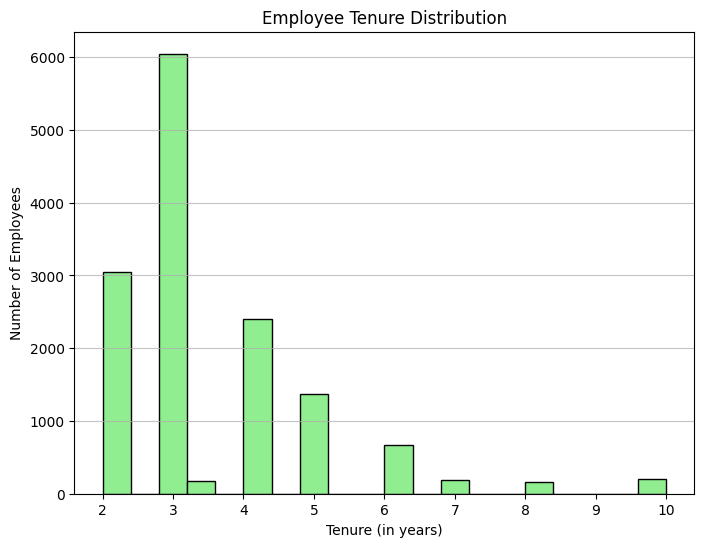

In [12]:
# Create a histogram of employee tenure
plt.figure(figsize=(8, 6))
plt.hist(df1['tenure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.75)

plt.show()

Confusion Matrix (Tenure vs. Status) to understand trend

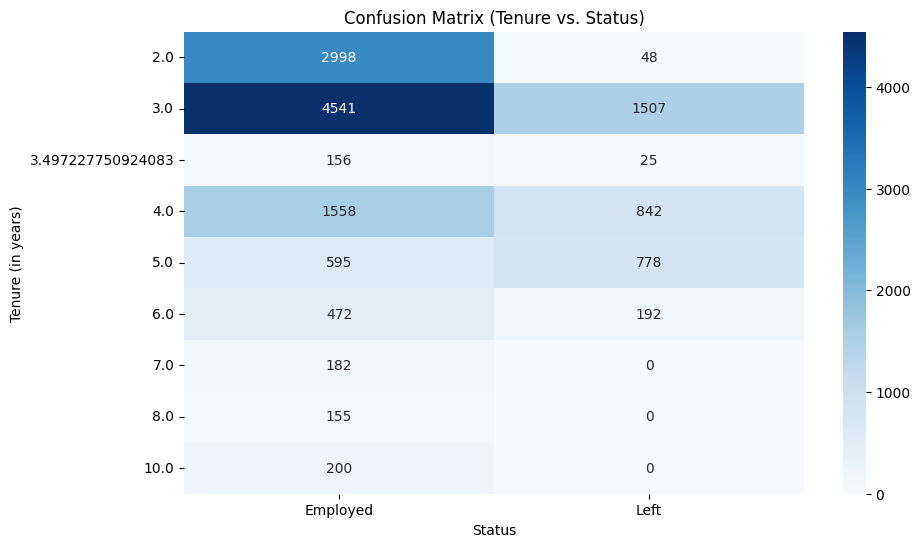

In [13]:
import seaborn as sns

# Create a crosstab between 'tenure' and 'status'
crosstab = pd.crosstab(df1['tenure'], df1['status'])

# Plot the crosstab as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tenure vs. Status)')
plt.xlabel('Status')
plt.ylabel('Tenure (in years)')

plt.show()

From the following Confusion Matrix between Tenure(in years) and Employee status, we can observe that employees who left the company have tenure of less than or equal to 6 years with the largest attrition rate bein observed at 3 years in the company

Boxplot to examine the distribution of job satisfaction scores among employees who left the company and those who are still employed

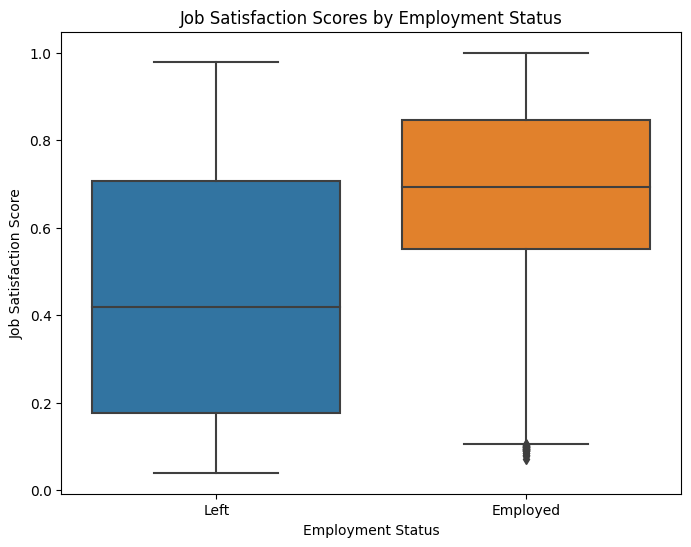

In [14]:
# Filter the data for employees who left and those who are still employed
left_employees = df1[df1['status'] == 'Left']
employed_employees = df1[df1['status'] == 'Employed']

# Create a boxplot to compare job satisfaction scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='satisfaction', data=pd.concat([left_employees, employed_employees]))
plt.title('Job Satisfaction Scores by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.show()

Pie Chart to show the distribution of attrition (employees who left vs employees who are still employed) in the dataset

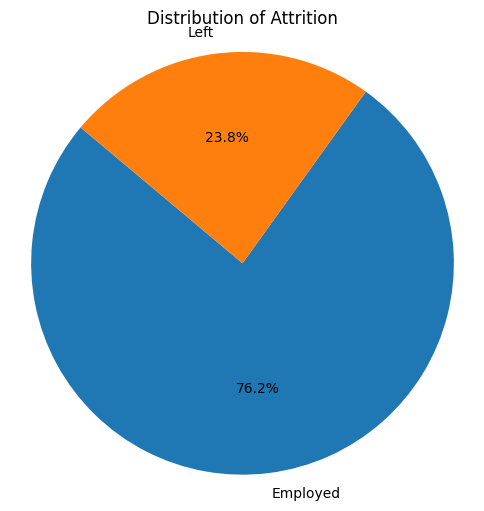

Percentage of employees who have left the company: 23.8%


In [15]:
# Count the number of employees in each employment status category
attrition_counts = df1['status'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attrition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

# Calculate the percentage of employees who have left the company
percentage_left = (attrition_counts['Left'] / attrition_counts.sum()) * 100
print(f"Percentage of employees who have left the company: {percentage_left:.1f}%")

Scatter Plot to explore the relationship between employee satisfaction scores and their last evaluation scores.

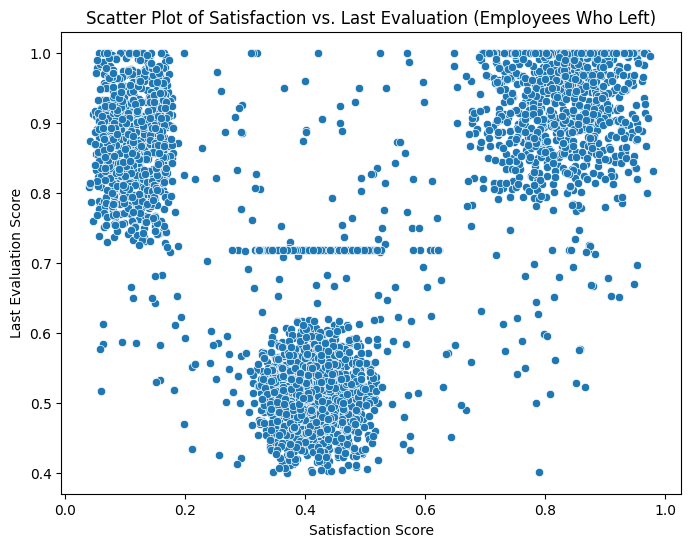

In [16]:
# Filter the data for employees who left
left_employees = df1[df1['status'] == 'Left']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees)
plt.title('Scatter Plot of Satisfaction vs. Last Evaluation (Employees Who Left)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')

# Show the scatter plot
plt.show()

Check for correlation between variables - satisfaction and last evaluation scores for employees who left

In [17]:
from scipy.stats import pearsonr

# Extract 'satisfaction' and 'last_evaluation' scores for employees who left
satisfaction_left = left_employees['satisfaction']
last_evaluation_left = left_employees['last_evaluation']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(satisfaction_left, last_evaluation_left)

# Set the significance level
alpha = 0.05

# Determine significance and print the result
if p_value < alpha:
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
    print("There is a statistically significant correlation between satisfaction and last evaluation scores for employees who left.")
else:
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
    print("There is no statistically significant correlation between satisfaction and last evaluation scores for employees who left.")

Pearson Correlation Coefficient: 0.18
There is a statistically significant correlation between satisfaction and last evaluation scores for employees who left.


Encoding salary column and dropping unimportant features

In [18]:
df1.drop(['department'],axis=1,inplace=True)
df1.replace({'salary':{'low':0,'medium':1,'high':2}},inplace=True)

In [19]:
df1.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,0.0,0.932868,4,0.0,0,0.829896,Left,5.0
1,232,0.0,0.718477,3,0.0,0,0.834544,Employed,2.0
2,184,0.0,0.788830,3,0.0,1,0.834988,Employed,3.0
3,206,0.0,0.575688,4,0.0,0,0.424764,Employed,2.0
4,249,0.0,0.845217,3,0.0,0,0.779043,Employed,3.0


Train-Test Splitting

In [20]:
from sklearn.model_selection import train_test_split
# Define the features (X) and the target variable (y)
X = df1.drop('status', axis=1)  # Features (all columns except 'status')
y = df1['status']  # Target variable ('status' column)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [21]:
X.head().columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure'],
      dtype='object')

In [26]:
y_train

2178     Employed
10775    Employed
10062        Left
5536     Employed
5227         Left
           ...   
10898        Left
578          Left
5848     Employed
2439         Left
7188     Employed
Name: status, Length: 11399, dtype: object

In [42]:
y_train.replace({'Employed':1,'Left':0},inplace=True)

In [34]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=33)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=33)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred = reg.predict(X_test)
y_pred_int = y_pred.astype(int)
y_test.replace({'Employed':1,'Left':0},inplace=True)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_int)
mse = mean_squared_error(y_test, y_pred_int)
rmse = mean_squared_error(y_test, y_pred_int, squared=False)
r2 = r2_score(y_test, y_pred_int)
mape = mean_absolute_percentage_error(y_test, y_pred_int)

# Print the metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Absolute Error: 0.03929824561403509
Mean Squared Error: 0.03929824561403509
Root Mean Squared Error: 0.19823785111334083
R-squared Score: 0.7765408495508065
Mean Absolute Percentage Error: 82170940569566.97
